<a href="https://colab.research.google.com/github/kumarchandan/100-days-of-deep-learning/blob/master/day-7/Day_7_Building_Complex_Models_Using_the_Functional_API_Part_2_(Multiple_Inputs).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Building Complex Models Using the Functional API

## California Housing Dataset

In [ ]:
from sklearn.datasets import fetch_california_housing
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

housing = fetch_california_housing()


In [ ]:
housing

{'DESCR': '.. _california_housing_dataset:\n\nCalifornia Housing dataset\n--------------------------\n\n**Data Set Characteristics:**\n\n    :Number of Instances: 20640\n\n    :Number of Attributes: 8 numeric, predictive attributes and the target\n\n    :Attribute Information:\n        - MedInc        median income in block\n        - HouseAge      median house age in block\n        - AveRooms      average number of rooms\n        - AveBedrms     average number of bedrooms\n        - Population    block population\n        - AveOccup      average house occupancy\n        - Latitude      house block latitude\n        - Longitude     house block longitude\n\n    :Missing Attribute Values: None\n\nThis dataset was obtained from the StatLib repository.\nhttp://lib.stat.cmu.edu/datasets/\n\nThe target variable is the median house value for California districts.\n\nThis dataset was derived from the 1990 U.S. census, using one row per census\nblock group. A block group is the smallest geograp

In [ ]:
print(housing.feature_names)
# features: 8
print(housing.data.shape)
# target
print(housing.target.shape)

['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup', 'Latitude', 'Longitude']
(20640, 8)
(20640,)


In [ ]:
import pandas as pd

housing_df = pd.DataFrame(housing.data, columns=housing.feature_names)
housing_df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25


In [ ]:
housing_df['sales'] = housing.target
housing_df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,sales
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


In [ ]:
corr_matrix = housing_df.corr()
corr_matrix

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,sales
MedInc,1.000000,-0.119034,0.326895,-0.062040,0.004834,0.018766,-0.079809,-0.015176,0.688075
HouseAge,-0.119034,1.000000,-0.153277,-0.077747,-0.296244,0.013191,0.011173,-0.108197,0.105623
AveRooms,0.326895,-0.153277,1.000000,0.847621,-0.072213,-0.004852,0.106389,-0.027540,0.151948
AveBedrms,-0.062040,-0.077747,0.847621,1.000000,-0.066197,-0.006181,0.069721,0.013344,-0.046701
Population,0.004834,-0.296244,-0.072213,-0.066197,1.000000,0.069863,-0.108785,0.099773,-0.024650
AveOccup,0.018766,0.013191,-0.004852,-0.006181,0.069863,1.000000,0.002366,0.002476,-0.023737
Latitude,-0.079809,0.011173,0.106389,0.069721,-0.108785,0.002366,1.000000,-0.924664,-0.144160
Longitude,-0.015176,-0.108197,-0.027540,0.013344,0.099773,0.002476,-0.924664,1.000000,-0.045967
sales,0.688075,0.105623,0.151948,-0.046701,-0.024650,-0.023737,-0.144160,-0.045967,1.000000


In [ ]:
corr_matrix['sales'].sort_values(ascending=False)

sales         1.000000
MedInc        0.688075
AveRooms      0.151948
HouseAge      0.105623
AveOccup     -0.023737
Population   -0.024650
Longitude    -0.045967
AveBedrms    -0.046701
Latitude     -0.144160
Name: sales, dtype: float64

In [ ]:
X_train_full, X_test, y_train_full, y_test = train_test_split(housing.data, housing.target, random_state=42) # default 25% split

In [ ]:
print(X_train_full.shape)
print(y_train_full.shape)
print(X_test.shape)
print(y_test.shape)

(15480, 8)
(15480,)
(5160, 8)
(5160,)


In [ ]:
X_train, X_valid, y_train, y_valid = train_test_split(X_train_full, y_train_full, random_state=42)

In [ ]:
print(X_train.shape)
print(y_train.shape)
print(X_valid.shape)
print(y_valid.shape)

(11610, 8)
(11610,)
(3870, 8)
(3870,)


In [ ]:
# Values before transformation
X_train[0]

array([ 3.52140000e+00,  1.50000000e+01,  3.04994451e+00,  1.10654828e+00,
        1.44700000e+03,  1.60599334e+00,  3.76300000e+01, -1.22430000e+02])

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
housing_df = pd.DataFrame(housing.data, columns=housing.feature_names)
housing_df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f35fda22940>,
      dtype=object)

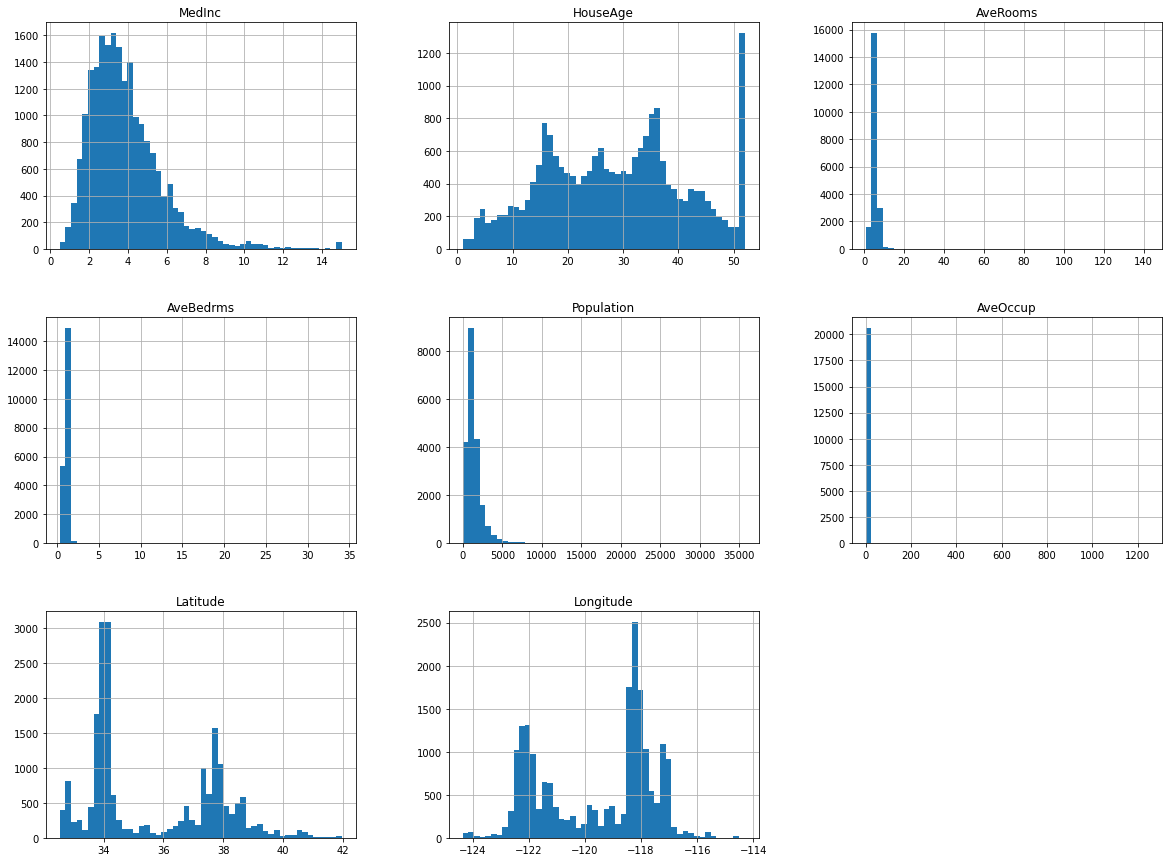

In [ ]:
housing_df.hist(bins=50, figsize=(20, 15))

In [ ]:
scalar = StandardScaler()

X_train = scalar.fit_transform(X_train) # fit().transform() - fit() calculates params required for z

X_valid = scalar.transform(X_valid)
X_test = scalar.transform(X_test)


In [ ]:
# transformed values
X_train[0]

array([-0.19397883, -1.07781319, -0.94338545,  0.01485314,  0.02073335,
       -0.57291624,  0.92926047, -1.42215523])

In [ ]:
import tensorflow as tf
from tensorflow import keras

In [ ]:
X_train.shape[1:]

(8,)

# Multiple Inputs

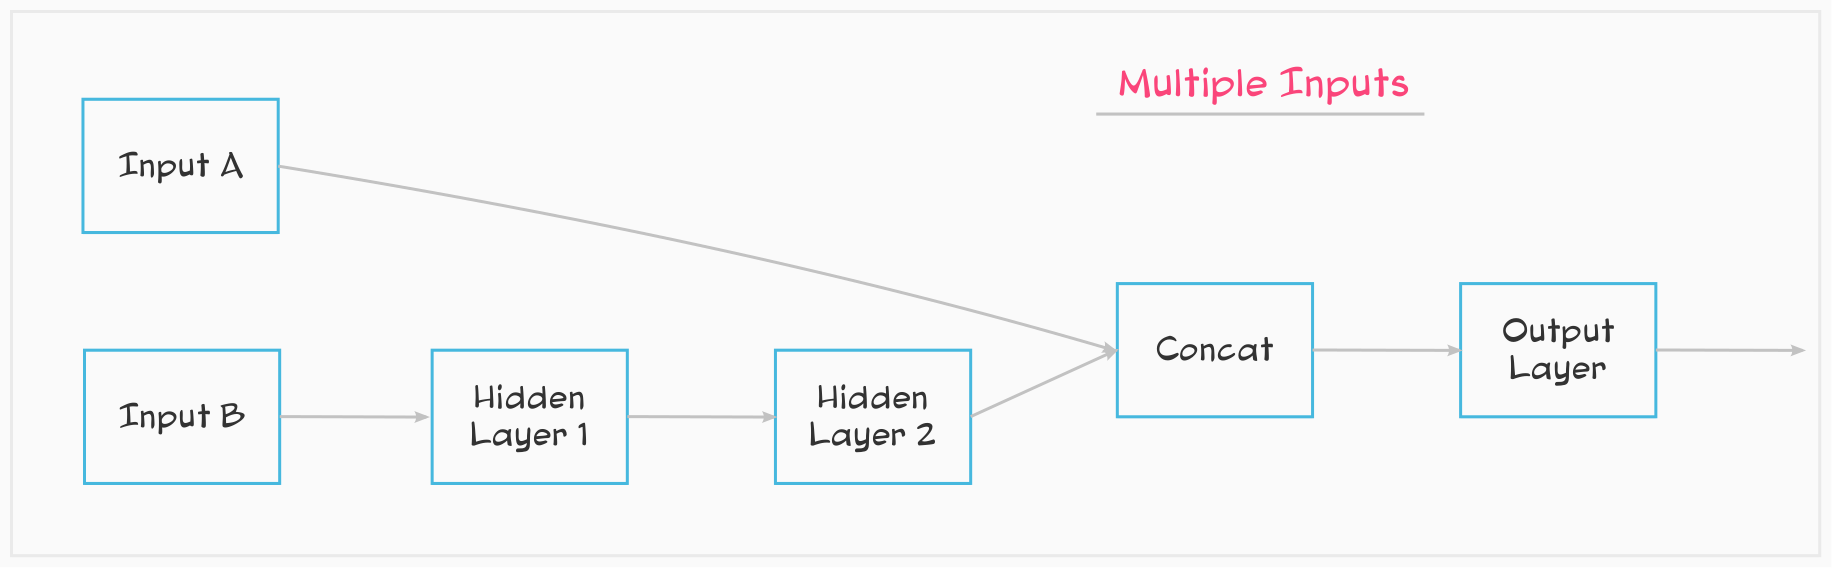

In [ ]:
input_A = keras.layers.Input(shape=[5], name='wide_input')
input_B = keras.layers.Input(shape=[6], name='deep_input')

hidden1 = keras.layers.Dense(30, activation='relu', name='hidden_1')(input_B)
hidden2 = keras.layers.Dense(30, activation='relu', name='hidden_2')(hidden1)

concat = keras.layers.concatenate([input_A, hidden2])
output = keras.layers.Dense(1, name='output')(concat)

model = keras.Model(inputs=[input_A, input_B], outputs=[output])

In [ ]:
model.summary()

Model: "functional_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
deep_input (InputLayer)         [(None, 6)]          0                                            
__________________________________________________________________________________________________
hidden_1 (Dense)                (None, 30)           210         deep_input[0][0]                 
__________________________________________________________________________________________________
wide_input (InputLayer)         [(None, 5)]          0                                            
__________________________________________________________________________________________________
hidden_2 (Dense)                (None, 30)           930         hidden_1[0][0]                   
_______________________________________________________________________________________

In [ ]:
X_train_A, X_train_B = X_train[:, :5], X_train[:, 2:]
X_valid_A, X_valid_B = X_valid[:, :5], X_valid[:, 2:]
X_test_A, X_test_B = X_test[:, :5], X_test[:, 2:]
X_new_A, X_new_B = X_test_A[:3], X_test_B[:3]

In [ ]:
model.compile(optimizer='adam', loss='huber_loss',)
history = model.fit(x=[X_train_A, X_train_B], y=y_train, epochs=30, validation_data=([X_valid_A, X_valid_B], y_valid))

Epoch 1/30
363/363 [==============================] - 1s 2ms/step - loss: 0.1402 - val_loss: 0.1538
Epoch 2/30
363/363 [==============================] - 1s 1ms/step - loss: 0.1391 - val_loss: 0.1414
Epoch 3/30
363/363 [==============================] - 1s 1ms/step - loss: 0.1382 - val_loss: 0.1481
Epoch 4/30
363/363 [==============================] - 1s 2ms/step - loss: 0.1387 - val_loss: 0.1539
Epoch 5/30
363/363 [==============================] - 1s 2ms/step - loss: 0.1392 - val_loss: 0.1474
Epoch 6/30
363/363 [==============================] - 1s 2ms/step - loss: 0.1382 - val_loss: 0.1387
Epoch 7/30
363/363 [==============================] - 1s 1ms/step - loss: 0.1374 - val_loss: 0.1506
Epoch 8/30
363/363 [==============================] - 1s 2ms/step - loss: 0.1376 - val_loss: 0.1316
Epoch 9/30
363/363 [==============================] - 1s 1ms/step - loss: 0.1378 - val_loss: 0.1477
Epoch 10/30
363/363 [==============================] - 1s 1ms/step - loss: 0.1372 - val_loss: 0.1587

### Evaluate the model

In [ ]:
hloss_test = model.evaluate(x=[X_test_A, X_test_B], y=y_test)
hloss_test

162/162 [==============================] - 0s 809us/step - loss: 0.1345


0.13451631367206573

### Predict

In [ ]:
X_new_A, X_new_B = X_test_A[:3], X_test_B[:3]

y_predict = model.predict([X_new_A, X_new_B])
y_predict

array([[0.35675246],
       [1.0723217 ],
       [4.2513256 ]], dtype=float32)

### A variant

- Take inputs with lower correlation via deep route
- Take inputs with higher correlation via simple route